# Gauss Bonnet theorem on torus

 This is a benchmark of computing surface integrals using high-order surface quadrature (HOSQ) method for algebraic varieties.
 
- Gauss-Bonnet Theorem requires that the Gaussian curvature, when integrated over the surface, must have 
\begin{equation*}
    \int_{\mathcal{M}}KdS=2\pi \chi\left(\mathcal{M}\right)
\end{equation*}
where $\chi\left(\mathcal{M}\right)$ is the Euler Characteristic of the surface. 

- For spherical topology the Euler Characteristic is $\chi\left(\mathcal{M}\right)=2$, therefore we have
\begin{equation*}
    \int_{\mathcal{M}}KdS=4\pi 
\end{equation*}

- For a torus the Euler Characteristic is $\chi\left(\mathcal{M}\right)=0$, therefore we have
\begin{equation*}
    \int_{\mathcal{M}}KdS=0
\end{equation*}

<img src="../images/torus.png" alt="drawing" width="300"/>



# Gauss Bonnet theorem on a Genus 2 surface

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from time import time
from numba import njit

#Local imports
import surfgeopy as sp

mesh_path1 ="../meshes/torus_496.mat"
mesh_path2 ="../meshes/torus_1232.mat"

R=2
r=1

@njit(fastmath=True)
def phi(x: np.ndarray):
    ph = np.sqrt(x[0]*x[0] + x[1]*x[1])
    return (ph - R)*(ph - R) + x[2]*x[2] - r*r
@njit(fastmath=True)
def dphi(x: np.ndarray):
    ph = np.sqrt(x[0]*x[0] + x[1]*x[1])
    return np.array([-2*R*x[0]/ph + 2*x[0],-2*R*x[1]/ph + 2*x[1],2*x[2]])



def fun_1(x: np.ndarray):
    t1=np.sqrt(x[0]*x[0] + x[1]*x[1])
    t2 = (t1 - 2) / 1
    return t2/(1*t1)

f1=lambda _: 1

def err_g(intp_degree,lp_degree,mesh_path, refinement):
    t0 = time()
    areas = sp.integration(phi,dphi, mesh_path,intp_degree,lp_degree,refinement, fun_1)
    t1 = time()
    sum_area = sum(areas)
    t1 = time()
    exact_area =0
    print("Relative error: ", abs(sum_area - exact_area))
    print ("The main function takes:",{(t1-t0)})
    error=abs(sum_area - exact_area)
    return error
Nrange = list(range(2,18))
lp_degree=float("inf")
error1=[] 
refinement=0

for n in Nrange:
    if n%1==0:print(n)
    erro1 = err_g(n,lp_degree,mesh_path2,refinement)
    error1.append(erro1)
    
plt.semilogy(Nrange, error1, '-xr')
plt.xlabel("n",fontsize=13)
plt.ylabel("Relative Error",fontsize=13)
plt.legend(["$N_{\Delta}=2528$"])
plt.xticks(np.arange(min(Nrange), max(Nrange)+1, 1.0))
plt.ylim([2.758195177427762e-17,3.9514540203871754e-05])
plt.grid()

In [ ]:
# # Extract the first column from each array
# first_columns = [arr[0] for arr in error1]

# # Print the first columns
# for value in first_columns:
#     print(value)
error1

# Experiment using the same degree to approximate the integrand and the geometry

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from time import time
from numba import njit

#Local imports
import surfgeopy as sp

mesh_path ="../meshes/torus_1232.mat"

R=2
r=1

@njit(fastmath=True)
def phi(x: np.ndarray):
    ph = np.sqrt(x[0]*x[0] + x[1]*x[1])
    return (ph - R)*(ph - R) + x[2]*x[2] - r*r
@njit(fastmath=True)
def dphi(x: np.ndarray):
    ph = np.sqrt(x[0]*x[0] + x[1]*x[1])
    return np.array([-2*R*x[0]/ph + 2*x[0],-2*R*x[1]/ph + 2*x[1],2*x[2]])



def fun_1(x: np.ndarray):
    t1=np.sqrt(x[0]*x[0] + x[1]*x[1])
    t2 = (t1 - 2) / 1
    return t2/(1*t1)

f1=lambda _: 1

def err_g(intp_degree,lp_degree,mesh_path, refinement):
    t0 = time()
    areas = sp.integration(phi,dphi, mesh_path,intp_degree,lp_degree,refinement, fun_1)
    t1 = time()
    sum_area = sum(areas)
    t1 = time()
    exact_area =0
    print("Relative error: ", abs(sum_area - exact_area))
    print ("The main function takes:",{(t1-t0)})
    error=abs(sum_area - exact_area)
    return error

error_interpg=np.array([0.0003739399434477819,
 8.19114866250567e-05,
 4.52814129855289e-07,
 3.6906839983447126e-08,
 2.0407103784592096e-10,
 7.994203216066254e-11,
 1.214896239165597e-13,
 1.1929346399597307e-13,
 1.4939438575112263e-14,
 7.598088824778415e-16,
 1.3877787807814457e-17,
 1.4953316362920077e-15,
 1.8665624601510444e-15,
 4.787836793695988e-16,
 1.1310397063368782e-15,
 1.2420620087993939e-15])

# here is the error obtained using Dune Curved Grid
error_interpgf=np.array([0.0004036412071008501,
0.0001579917096508586,
3.425761599951116e-07,
8.841745447948912e-08,
9.948354987021624e-11,
1.9813943541446832e-10,
1.4922334201639131e-12,
5.007036452120417e-13,
2.410571742217371e-14,
1.3079815008865125e-15,
1.3183898417423734e-16,
7.424616477180734e-16,
9.575673587391975e-16,
1.8145207558717402e-15,
8.257283745649602e-16,
2.2100377083944522e-15])
Nrange = list(range(2,18))
lp_degree=float("inf")
# error1=[] 
# refinement=0

# for n in Nrange:
#     if n%1==0:print(n)
#     erro1 = err_g(n,lp_degree,mesh_path,refinement)
#     error1.append(erro1)
    
# Plotting the main semilogy plots
fig, ax1 = plt.subplots()
ax1.plot(Nrange, error_interpg, '-or', label=r'$HOSQ_{interp.\ only\ the\ geometry}$'
)
ax1.plot(Nrange, error_interpgf, '-ok',  label=r'$HOSQ_{interp.\ the\ geometry\ and\ the\ integrand}$')
# ax1.plot(Nrange2, error1ref_duff, '-oy', label='HOSQ-Duffy')

# Define custom x-axis values
custom_x = list(range(2, 18, 2))  # Include odd values from 3 to 25

# Set custom x-axis ticks and labels
ax1.set_xticks(custom_x)  # Set custom ticks
ax1.set_xticklabels(custom_x)  # Label the ticks as "10^x"
plt.ylim([1.0e-18,1.0e-2])

# Axis labels and legend
ax1.set_xlabel("Polynomial degree", fontsize=14)
ax1.set_ylabel("Absolute error", fontsize=14)

# Customize tick parameters and grid
ax1.tick_params(axis='both', which='both', direction='in', labelsize=11)
ax1.grid()

# Add the label for the rate of convergence manually
# ax1.annotate("$CN^{-14}$", xy=(10, 1e-8), fontsize=11, color='k')

# Plot the convergent line on the same plot
# ax1.plot(8*np.log10(Nrange3), 0.4992 * (1 / np.power(Nrange3, 7) / np.power(Nrange3, 7)), '--r', label="$CN^{-14}$")
# plt.plot(np.arange(2, 12), model(np.arange(2, 12),a,b),'--k', label=r"$9.5 \times n^{-17}$")
# plt.plot(np.arange(2, 12), model2(np.arange(2, 12),aa,rho), '--m' ,label=r"$0.05\times 30^{-n}$")
ax1.legend(frameon=False, prop={'size': 11}, loc='best')
# Save the figure for use in your scientific paper
plt.yscale("log")
plt.savefig("GB_torus_geom_and_int_linf.pdf", dpi=300, bbox_inches='tight')

# plt.xscale("log")
# Show the plot
# plt.show()

- For a genus two surface, the Euler Characteristic is $\chi\left(\mathcal{M}\right)=2-2g$, where $g$ is the genus of the surface, therefore we have
\begin{equation*}
    \int_{\mathcal{M}}KdS=-4\pi
\end{equation*}

<img src="../images/genus_2.png" alt="drawing" width="300"/>

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from time import time
from numba import njit

#Local imports
import surfgeopy as sp

mesh_path ="../meshes/genus_N=15632.mat"

@njit(fastmath=True)
def phi(x: np.ndarray):
    return 2*x[1]*(x[1]*x[1] - 3*x[0]*x[0])*(1 - x[2]*x[2])+(x[0]*x[0] + x[1]*x[1])**2-(9*x[2]*x[2] - 1)*(1 - x[2]*x[2]);

@njit(fastmath=True)
def dphi(x: np.ndarray):
    return np.array([4*x[0]*(x[0]*x[0] + x[1]*x[1] + 3*x[1]*(x[2]*x[2] - 1)) ,
        4*x[1]*(x[0]*x[0] + x[1]*x[1]) + 4*x[1]*x[1]*(1 - x[2]*x[2]) + 2*(3*x[0]*x[0] - x[1]*x[1])*(x[2]*x[2] - 1) ,
        4*x[2]*(x[1]*(3*x[0]*x[0] - x[1]*x[1]) + 9*x[2]*x[2] - 5)])


def fun_1(x: np.ndarray):
    return (4*1**2*(-900*(x[0]**2 + x[1]**2)*x[2]**2 + 45*1**10*(x[0]**2 + x[1]**2)*(-3*x[0]**2*x[1] + x[1]**3)**2*x[2]**6 - 6*1**3*x[1]*(-3*x[0]**2 + x[1]**2)*x[2]**2*(159*(x[0]**2 + x[1]**2) - 460*x[2]**2)+\
                                             15*1*x[1]*(-3*x[0]**2 + x[1]**2)*(9*(x[0]**2 + x[1]**2) - 40*x[2]**2) + 15*1**9*x[1]*(-3*x[0]**2 + x[1]**2)*x[2]**4*(3*x[0]**6 - 9*x[0]**4*x[1]**2 + 21*x[0]**2*x[1]**4 + x[1]**6 + 27*(x[0]**2 + x[1]**2)*x[2]**4) + \
                                             15*1**2*(3*(x[0]**6 + 21*x[0]**4*x[1]**2 - 9*x[0]**2*x[1]**4 + 3*x[1]**6) + 20*(x[0]**2 + x[1]**2)**2*x[2]**2 + 336*(x[0]**2 + x[1]**2)*x[2]**4) + 9*1**5*x[1]*(-3*x[0]**2 + x[1]**2)*(x[0]**6 + 21*x[0]**4*x[1]**2 - 9*x[0]**2*x[1]**4 + 3*x[1]**6 + 212*(x[0]**2 + x[1]**2)*x[2]**4 - 456*x[2]**6) + \
                                             1**4*(-20*x[0]**8 + 163*x[0]**6*x[1]**2 - 39*x[0]**4*x[1]**4 - 215*x[0]**2*x[1]**6 + 7*x[1]**8 - 3*(171*x[0]**6 + 2151*x[0]**4*x[1]**2 - 579*x[0]**2*x[1]**4 + 353*x[1]**6)*x[2]**2 - 1080*(x[0]**2 + x[1]**2)**2*x[2]**4 - 10296*(x[0]**2 + x[1]**2)*x[2]**6) + \
                                             3*1**6*x[2]**2*(3*(x[0]**2 + x[1]**2)*(12*x[0]**6 + 27*x[0]**4*x[1]**2 + 42*x[0]**2*x[1]**4 + 11*x[1]**6) + (345*x[0]**6 + 3213*x[0]**4*x[1]**2 - 417*x[0]**2*x[1]**4 + 587*x[1]**6)*x[2]**2 + 324*(x[0]**2 + x[1]**2)**2*x[2]**4 + 3024*(x[0]**2 + x[1]**2)*x[2]**6) - \
                                             2*1**7*x[1]*(-3*x[0]**2 + x[1]**2)*(2*(x[0]**2 + x[1]**2)**4 + 3*(9*x[0]**6 + 9*x[0]**4*x[1]**2 + 39*x[0]**2*x[1]**4 + 7*x[1]**6)*x[2]**2 + 747*(x[0]**2 + x[1]**2)*x[2]**6 - 972*x[2]**8) + 3*1**8*x[2]**2*(-4*(x[0]**2 + x[1]**2)**2*(3*x[0]**6 - 9*x[0]**4*x[1]**2 + \
                                             21*x[0]**2*x[1]**4 + x[1]**6) - 21*x[1]**2*(-3*x[0]**2 + x[1]**2)**2*(x[0]**2 + x[1]**2)*x[2]**2 - 9*(21*x[0]**6 + 153*x[0]**4*x[1]**2 + 3*x[0]**2*x[1]**4 + 31*x[1]**6)*x[2]**4 - 972*(x[0]**2 + x[1]**2)*x[2]**8)))/(100*x[2]**2 - 12*1**5*x[1]*(-3*x[0]**2 + x[1]**2)*x[2]**2*(x[0]**2 + x[1]**2 + 6*x[2]**2) + \
                                             4*1**3*x[1]*(-3*x[0]**2 + x[1]**2)*(3*(x[0]**2 + x[1]**2) + 10*x[2]**2) + 1**6*x[2]**2*(4*(-3*x[0]**2*x[1] + x[1]**3)**2 + 9*(x[0]**2 + x[1]**2)**2*x[2]**2) + 9*1**2*((x[0]**2 + x[1]**2)**2 - 40*x[2]**4) + 2*1**4*(2*(x[0]**2 + x[1]**2)**3 - 9*(x[0]**2 + x[1]**2)**2*x[2]**2 + 162*x[2]**6))**2



def err_g(intp_degree,lp_degree,mesh_path, refinement):
    t0 = time()
    areas = sp.integration(phi,dphi, mesh_path,intp_degree,lp_degree,refinement, fun_1)
    t1 = time()
    sum_area = sum(areas)
    t1 = time()
    exact_area =-4*pi
    print("Relative error: ", abs((sum_area - exact_area)/exact_area))
    print ("The main function takes:",{(t1-t0)})
    error=abs((sum_area - exact_area)/exact_area)
    return error

Nrange = list(range(2,15))
lp_degree=float("inf")
error1=[] 
refinement=0
for n in Nrange:
    if n%1==0:print(n)
    erro1 = err_g(n,lp_degree,mesh_path,refinement)
    error1.append(erro1)
    
plt.semilogy(Nrange,error1, '-xr')
plt.xlabel("n",fontsize=13)
plt.ylabel("Relative Error",fontsize=13)
plt.legend(["$N_{\Delta}=15632$"])
plt.xticks(np.arange(min(Nrange), max(Nrange)+1, 1.0))
plt.ylim([2.758195177427762e-14,3.9514540203871754e-07])
plt.grid()

# Gauss Bonnet theorem on ellipsoid

- For an oblate spheroid, that is an ellipsoid where $(a = b>c)$, the Euler Characteristic is $\chi\left(\mathcal{M}\right)=2$, therefore we have
\begin{equation*}
    \int_{\mathcal{M}}KdS=4\pi 
\end{equation*}

<img src="../images/ellipsoid.png" alt="drawing" width="300"/>

2
Relative error:  0.00020773573348190349
The main function takes: {0.9488749504089355}
3
Relative error:  4.688255345756531e-05
The main function takes: {1.0634901523590088}
4
Relative error:  1.0575779104759049e-07
The main function takes: {1.565934181213379}
5
Relative error:  1.0684724580867624e-08
The main function takes: {2.147213935852051}
6
Relative error:  3.293542119547685e-10
The main function takes: {3.2198898792266846}
7
Relative error:  1.7385802444190393e-10
The main function takes: {4.903077125549316}
8
Relative error:  9.453315303238787e-12
The main function takes: {7.188506126403809}
9
Relative error:  9.770663981455923e-13
The main function takes: {10.378515243530273}
10
Relative error:  6.21975137708421e-14
The main function takes: {14.842711925506592}
11
Relative error:  1.668024232945311e-14
The main function takes: {20.458303928375244}
12
Relative error:  1.5549378442710527e-15
The main function takes: {27.775479078292847}
13
Relative error:  1.4135798584282298e-

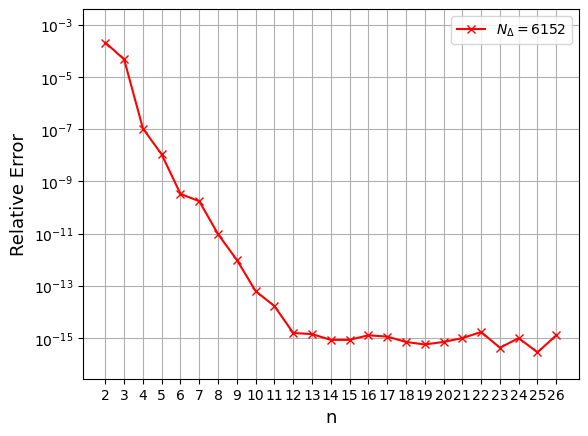

In [3]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from time import time
import scipy.io
from numba import njit

#Local imports
import surfgeopy as sp

mesh_path ="../meshes/ellipsoid_a=1_b=08_0.6_248.mat"
a=1
b=0.8
c=0.6

@njit(fastmath=True)
def phi(x: np.ndarray):
    return (x[0]**2/a**2+x[1]**2/b**2+x[2]**2/c**2)-1

@njit(fastmath=True)
def dphi(x: np.ndarray):
    return np.array([2*x[0]/a**2, 2*x[1]/b**2, 2*x[2]/c**2])


def fun_1(x: np.ndarray):
    return 1.0 / (((a*b*c)**2) * (x[0]**2/(a**4) + x[1]**2/(b**4) + x[2]**2/(c**4))**2)

def err_g(intp_degree,lp_degree,mesh_path, refinement):
    t0 = time()
    areas = sp.integration(phi,dphi, mesh_path,intp_degree,lp_degree,refinement, fun_1)
    t1 = time()
    sum_area = sum(areas)
    t1 = time()
    exact_area =4*pi
    print("Relative error: ", abs((sum_area - exact_area)/exact_area))
    print ("The main function takes:",{(t1-t0)})
    error=abs((sum_area - exact_area)/exact_area)
    time_s=t1-t0
    return error, time

Nrange = list(range(2,27))
lp_degree=float("inf")
error1=[] 
execution_times=[]
refinement=0
for n in Nrange:
    if n%1==0:print(n)
    erro1,times = err_g(n,lp_degree,mesh_path,refinement)
    error1.append(erro1)
    execution_times.append(times)

    
plt.semilogy(Nrange, error1, '-xr')
plt.xlabel("n",fontsize=13)
plt.ylabel("Relative Error",fontsize=13)
plt.legend(["$N_{\Delta}=6152$"])
plt.xticks(np.arange(min(Nrange), max(Nrange)+1, 1.0))
plt.ylim([2.758195177427762e-17,3.9514540203871754e-03])
plt.grid()

In [6]:
execution_times

[<function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>,
 <function time.time>]

# Gauss Bonnet theorem on the first Dziuk’s surface

- Consider the Dzikus surface  with implicit equation as:    $\phi(x,y,z) = (x-z^2)^2 +y^2 +z^2-1 = 0$, 

the Euler Characteristic is $\chi\left(\mathcal{M}\right)=2$, therefore we have
\begin{equation*}
    \int_{\mathcal{M}}KdS=4\pi 
\end{equation*}

<img src="../images/strange_img.png" alt="drawing" width="300"/>

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from time import time
from numba import njit

#Local imports
import surfgeopy as sp

mesh_path ="../meshes/dziukmesh_N=8088.mat"

@njit(fastmath=True)
def phi(x: np.ndarray):
    return (x[0]-x[2]**2)**2+x[1]**2+x[2]**2-1

@njit(fastmath=True)
def dphi(x: np.ndarray):
    return np.array([2*(x[0]-x[2]**2), 2*x[1], 2*(-2*x[0]*x[2]+2*x[2]**3+x[2])])


def fun_1(x: np.ndarray):
    
    return (x[1]**2+x[2]**2-(x[0]-x[2]**2)*(x[0]*(2*x[0]-1)+2*x[1]**2+x[2]**2-4*x[0]*x[2]**2+2*x[2]**4))/(x[1]**2+x[2]**2+(x[0]-x[2]**2)*(x[0]+(4*x[0]-5)*x[2]**2-4*x[2]**4))**2

def err_g(intp_degree,lp_degree,mesh_path, refinement):
    t0 = time()
    areas = sp.integration(phi,dphi, mesh_path,intp_degree,lp_degree,refinement, fun_1)
    t1 = time()
    sum_area = sum(areas)
    t1 = time()
    exact_area =4*pi
    print("Relative error: ", abs((sum_area - exact_area)/exact_area))
    print ("The main function takes:",{(t1-t0)})
    error=abs((sum_area - exact_area)/exact_area)
    return error

Nrange = list(range(2,15))
lp_degree=float("inf")
error1=[] 
refinement=0
for n in Nrange:
    if n%1==0:print(n)
    erro1 = err_g(n,lp_degree,mesh_path,refinement)
    error1.append(erro1)

plt.semilogy(Nrange, error1, '-xr')
plt.xlabel("n",fontsize=13)
plt.ylabel("Relative Error",fontsize=13)
plt.legend(["$N_{\Delta}=8088$"])
plt.xticks(np.arange(min(Nrange), max(Nrange)+1, 1.0))
plt.ylim([2.758195177427762e-14,3.9514540203871754e-04])
plt.grid()

# Gauss Bonnet theorem on  Bioconcave surface

- Consider the bioconcave surface

The implicit equation for the surface is 

$\phi(x,y,z) = (d^2 + x^2 + y^2 + z^2)^3 - 8d^2(y^2 + z^2) - c^4 = 0$

the Euler Characteristic is $\chi\left(\mathcal{M}\right)=2$, therefore we have
\begin{equation*}
    \int_{\mathcal{M}}KdS=4\pi 
\end{equation*}

<img src="../images/bio_1.png" alt="drawing" width="800"/>

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from time import time
from numba import njit

#Local imports
import surfgeopy as sp

mesh_path ="../meshes/vogitMesh_N=5980.mat"

d=0.80
#d=0.85
# c=0.475
c=-0.9344

@njit(fastmath=True)
def phi(x: np.ndarray):
    return (d**2 + x[0]**2 + x[1]**2 + x[2]**2)**3 - 8*d**2*(x[1]**2 + x[2]**2) - c**4 ;

@njit(fastmath=True)
def dphi(x: np.ndarray):
    
    return np.array([6*x[0]*(d**2+x[0]**2+x[1]**2 + x[2]**2)**2, 6*x[1]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2-16*d**2*x[1], 6*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2 - 16*d**2*x[2]])


def fun_1(x: np.ndarray):
    return (6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)* \
         ((-16*d**2*x[2] + 6*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)* \
            (24*x[0]**2*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2* \
               (16*d**2 - 6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2) - \
              24*x[1]*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2* \
               (-16*d**2*x[1] + 6*x[1]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2) + \
              (-16*d**2*x[2] + 6*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)* \
               (-96*x[0]**2*x[1]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2) + \
                 (d**2 + 5*x[0]**2 + x[1]**2 + x[2]**2)* \
                  (-16*d**2 + 24*x[1]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2) + \
                    6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2))) + \
           (-16*d**2*x[1] + 6*x[1]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)* \
            (24*x[0]**2*x[1]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2* \
               (16*d**2 - 6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2) -  \
              24*x[1]*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2* \
               (-16*d**2*x[2] + 6*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2) + \
              (-16*d**2*x[1] + 6*x[1]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)* \
               (-96*x[0]**2*x[2]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2) + \
                 (d**2 + 5*x[0]**2 + x[1]**2 + x[2]**2)* \
                  (-16*d**2 + 24*x[2]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2) +  \
                    6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2))) +  \
           6*x[0]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2* \
            (4*x[1]*(16*d**2 - 6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)* \
               (-16*d**2*x[1] + 6*x[1]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2) +  \
              4*x[2]*(16*d**2 - 6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)* \
               (-16*d**2*x[2] + 6*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2) + \
              (d**2 + x[0]**2 + x[1]**2 + x[2]**2)* \
               (-576*x[1]**2*x[2]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2 + \
                 (-16*d**2 + 24*x[1]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2) + \
                    6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)* \
                  (-16*d**2 + 24*x[2]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2) +  \
                    6*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)))))/ \
       (36*x[0]**2*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**4 +  \
          (16*d**2*x[1] - 6*x[1]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)**2 +  \
          (16*d**2*x[2] - 6*x[2]*(d**2 + x[0]**2 + x[1]**2 + x[2]**2)**2)**2)**2

def err_g(intp_degree,lp_degree,mesh_path, refinement):
    t0 = time()
    areas = sp.integration(phi,dphi,mesh_path,intp_degree,lp_degree,refinement, fun_1)
    t1 = time()
    sum_area = sum(areas)
    t1 = time()
    exact_area =4*pi
    print("Relative error: ", abs((sum_area - exact_area)/exact_area))
    print ("The main function takes:",{(t1-t0)})
    error=abs((sum_area - exact_area)/exact_area)
    return error

errorkn=np.array([1.4349082934185205e-07,
1.5840015691848846e-07,
1.8874347269670787e-09,
8.39397855733267e-12,
2.8185368797200473e-12,
1.4983946499339233e-13,
1.7245674272824403e-14,
6.643825334612679e-15,
5.512961447870095e-15,
4.947529504498804e-15,
5.3716034620272725e-15,
5.795677419555742e-15,
6.078393391241388e-15])

Nrange = list(range(2,15))
lp_degree=float("inf")
error1=[] 
refinement=0
# for n in Nrange:
#     if n%1==0:print(n)
#     erro1 = err_g(n,lp_degree,mesh_path,refinement)
#     error1.append(erro1)
    
plt.semilogy(Nrange, errorkn, '-xr')
plt.xlabel("n",fontsize=13)
plt.ylabel("Relative Error",fontsize=13)
# plt.semilogy(Nrange, error, '-xb')
plt.legend(["$N_{\Delta}=5980$"])
plt.xticks(np.arange(min(Nrange), max(Nrange)+1, 1.0))
plt.ylim([2.758195177427762e-17,3.9514540203871754e-03])
plt.grid()